In [1]:
import tensorflow as tf
from tensorflow.keras import models,layers
import matplotlib.pyplot as plt

In [2]:
IMAGE_WIDTH =255
IMAGE_HEIGHT =255
BATCH_SIZE =32
CHANNELS=3
EPOCHS=50

In [4]:
dataset=tf.keras.preprocessing.image_dataset_from_directory("RoseLeaves",
                                                   shuffle=True,
                                                    image_size=(IMAGE_HEIGHT,IMAGE_WIDTH),
                                                    batch_size=BATCH_SIZE
                                                   )

Found 917 files belonging to 3 classes.


In [5]:
class_names=dataset.class_names
class_names

['Black Spot', 'Downy Mildew', 'Fresh Leaf']

In [6]:
len(dataset)

29

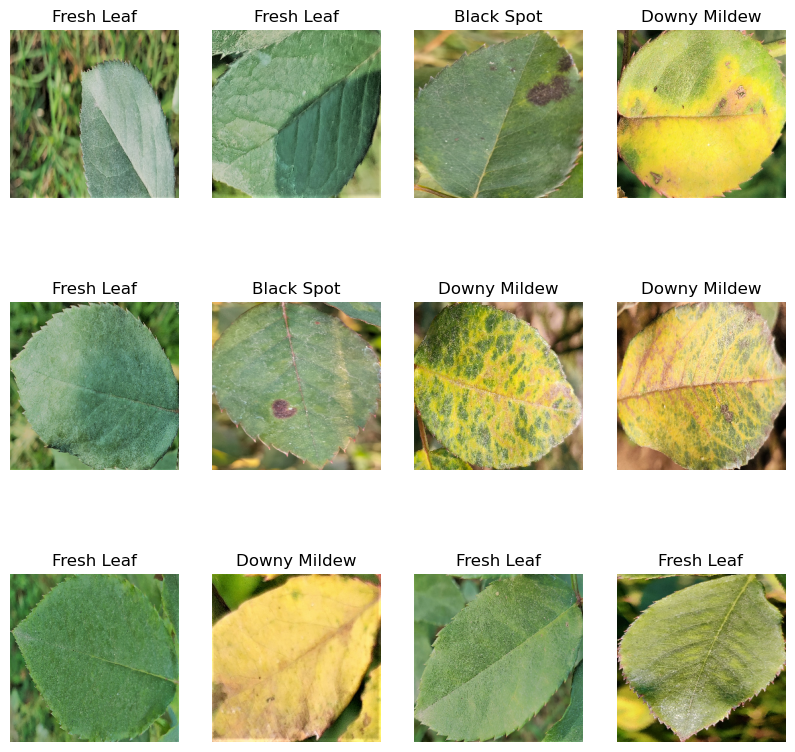

In [7]:
plt.figure(figsize=(10,10))
for image_batch ,label_batch in dataset.take(1):
    for i in range(12):
        ax=plt.subplot(3,4,i+1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_names[label_batch[i]])
        plt.axis("off")
     

In [8]:
len(dataset)

29

In [9]:
train_size=0.8
len(dataset)*train_size


23.200000000000003

In [13]:
train_ds=dataset.take(23)
len(train_ds)

23

In [14]:
test_ds=dataset.skip(23) 
len(test_ds)

6

In [12]:
val_size =0.1
len(dataset)*val_size

2.9000000000000004

In [15]:
val_ds=test_ds.take(2)
len(val_ds)

2

In [16]:
test_ds =test_ds.skip(2)
len(test_ds)

4

In [17]:
import tensorflow as tf

def get_dataset_partitions_tf(ds, train_split=0.8, val_split=0.1, test_split=0.1, shuffle=True, shuffle_size=10000):
    ds_size = len(ds)
    
    if shuffle:
        ds = ds.shuffle(shuffle_size, seed=12)
    
    train_size = int(train_split * ds_size)
    val_size = int(val_split * ds_size)
    
    train_ds = ds.take(train_size)
    val_ds = ds.skip(train_size).take(val_size)
    test_ds = ds.skip(train_size + val_size)
    
    return train_ds, val_ds, test_ds



train_ds, val_ds, test_ds = get_dataset_partitions_tf(dataset)


In [18]:
len(train_ds)

23

In [19]:
len(val_ds)

2

In [20]:
len(test_ds)

4

In [21]:
train_ds=train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds=val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds=test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [22]:
resize_and_rescale=tf.keras.Sequential([
     layers.experimental.preprocessing.Resizing(IMAGE_HEIGHT,IMAGE_WIDTH),
     layers.experimental.preprocessing.Rescaling(1.0/255)
])

In [23]:
data_augmentation=tf.keras.Sequential([
     layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
     layers.experimental.preprocessing.RandomRotation(0.2)
])

In [24]:

input_shape = (BATCH_SIZE, IMAGE_HEIGHT, IMAGE_WIDTH, CHANNELS)
n_classes = 3


model = models.Sequential([
    resize_and_rescale,
    layers.Conv2D(32, kernel_size = (3,3), activation='relu', input_shape=input_shape),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax'),
])

model.build(input_shape=input_shape)



In [25]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (32, 255, 255, 3)         0         
                                                                 
 conv2d (Conv2D)             (32, 253, 253, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (32, 126, 126, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (32, 124, 124, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (32, 62, 62, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (32, 60, 60, 64)         

In [29]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)


In [30]:
history = model.fit(
    train_ds,
    batch_size=BATCH_SIZE,
    validation_data=val_ds,
    verbose=1,
    epochs=50,
)

Epoch 1/50
23/23 [==============================] - 49s 2s/step - loss: 0.9821 - accuracy: 0.4579 - val_loss: 0.6667 - val_accuracy: 0.6250
Epoch 2/50
23/23 [==============================] - 33s 1s/step - loss: 0.6802 - accuracy: 0.6110 - val_loss: 0.6504 - val_accuracy: 0.6406
Epoch 3/50
23/23 [==============================] - 40s 2s/step - loss: 0.6230 - accuracy: 0.6538 - val_loss: 0.5329 - val_accuracy: 0.7188
Epoch 4/50
23/23 [==============================] - 38s 2s/step - loss: 0.6475 - accuracy: 0.6662 - val_loss: 0.6055 - val_accuracy: 0.5469
Epoch 5/50
23/23 [==============================] - 35s 2s/step - loss: 0.6670 - accuracy: 0.5834 - val_loss: 0.6563 - val_accuracy: 0.6250
Epoch 6/50
23/23 [==============================] - 37s 2s/step - loss: 0.6409 - accuracy: 0.6497 - val_loss: 0.5644 - val_accuracy: 0.7188
Epoch 7/50
23/23 [==============================] - 34s 1s/step - loss: 0.6112 - accuracy: 0.6717 - val_loss: 0.5596 - val_accuracy: 0.7344
Epoch 8/50
23/23 [==

In [34]:

scores = model.evaluate(test_ds)


4/4 [==============================] - 1s 250ms/step - loss: 0.4460 - accuracy: 0.9141


In [35]:
scores

[0.44601303339004517, 0.9140625]

In [36]:

history.params

{'verbose': 1, 'epochs': 50, 'steps': 23}

In [37]:

history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [38]:
len(history.history['loss'])

50

In [39]:
history.history['loss'][:5]

[0.982106626033783,
 0.6802180409431458,
 0.6230058670043945,
 0.6474776268005371,
 0.6670339703559875]

In [40]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

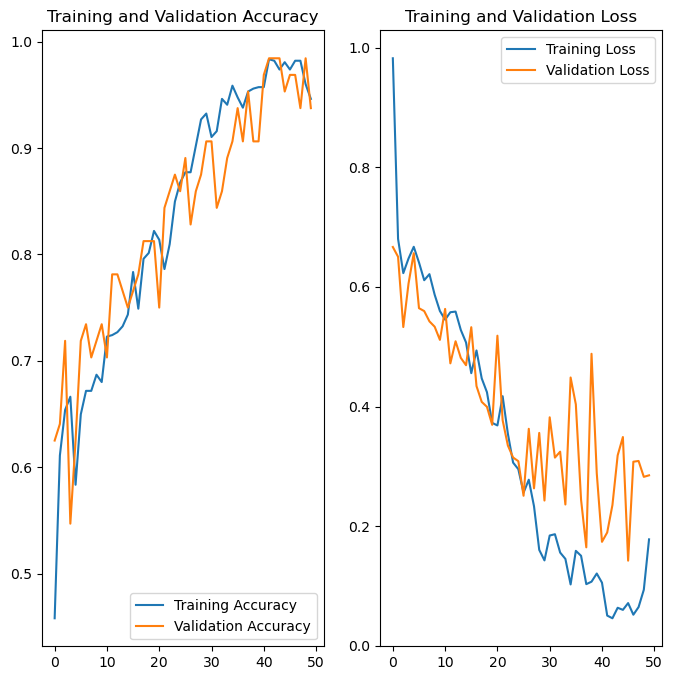

In [41]:
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS), acc, label='Training Accuracy')
plt.plot(range(EPOCHS), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(EPOCHS), loss, label='Training Loss')
plt.plot(range(EPOCHS), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()


first image to predict
actual label: Black Spot
1/1 [==============================] - 1s 735ms/step
predicted label: Black Spot


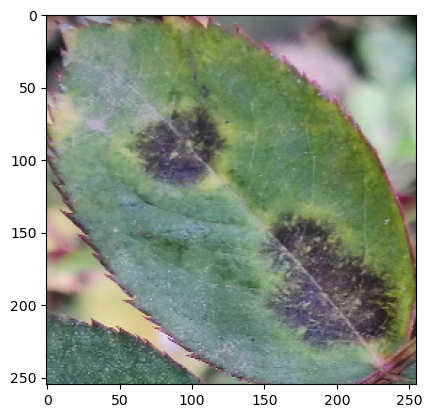

In [42]:
import numpy as np
for images_batch, labels_batch in test_ds.take(1):
    
    first_image = images_batch[0].numpy().astype('uint8')
    first_label = labels_batch[0].numpy()
    
    print("first image to predict")
    plt.imshow(first_image)
    print("actual label:",class_names[first_label])
    
    batch_prediction = model.predict(images_batch)
    print("predicted label:",class_names[np.argmax(batch_prediction[0])])

In [43]:

def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

1/1 [==============================] - 0s 40ms/step


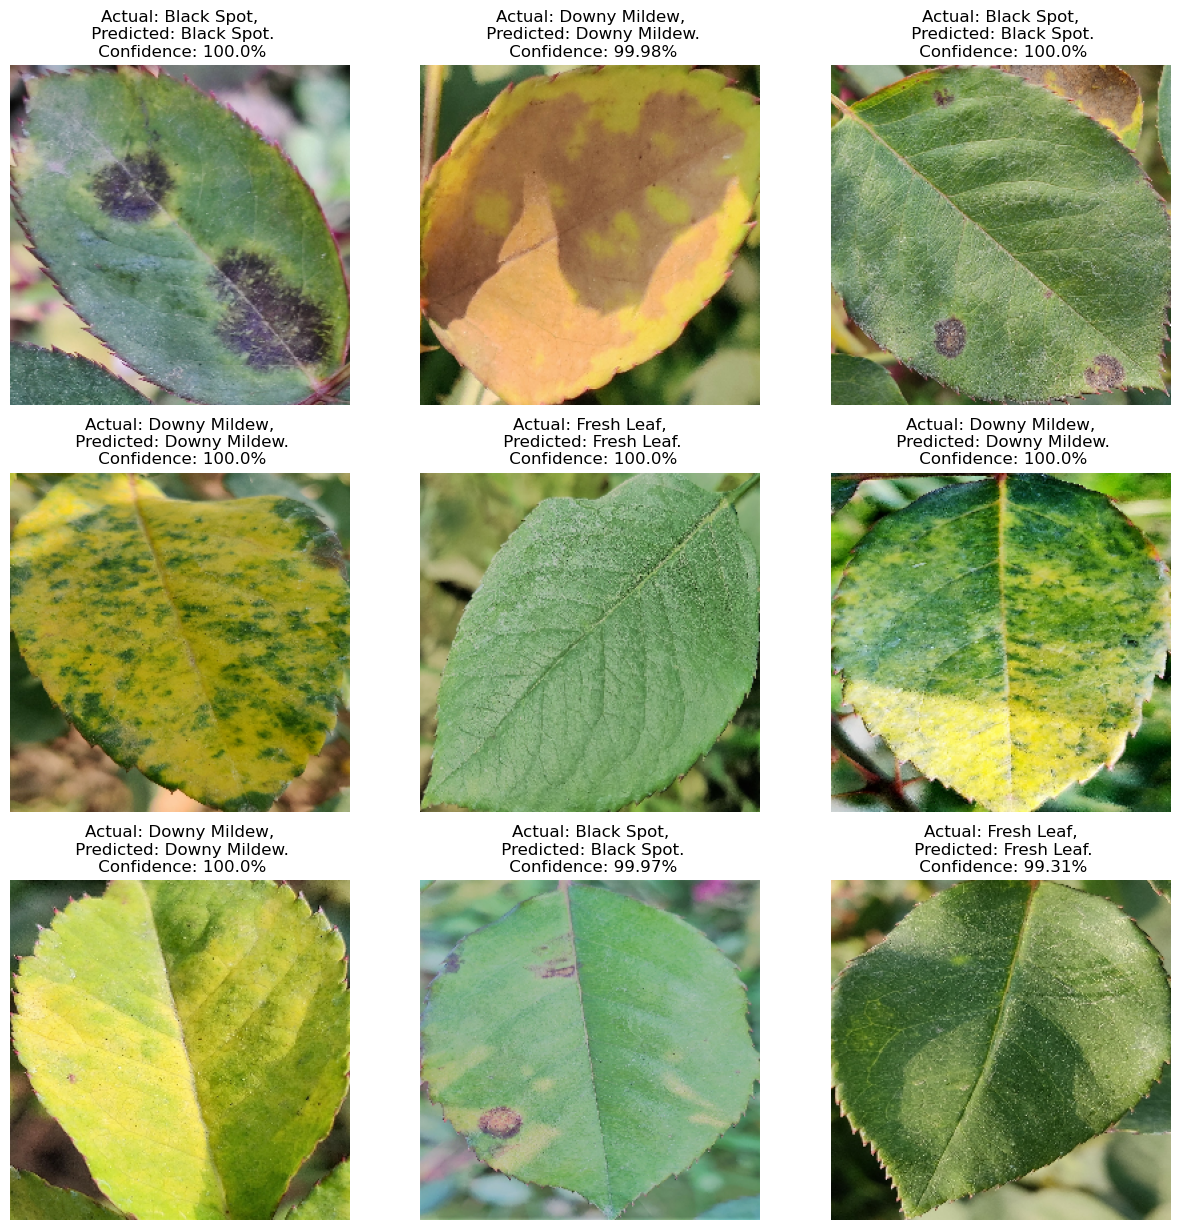

In [46]:
plt.figure(figsize=(15, 15))
for images, labels in test_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        
        predicted_class, confidence = predict(model, images[i].numpy())
        actual_class = class_names[labels[i]] 
        
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")
        
        plt.axis("off")

In [50]:
model_version=3

In [51]:

model.save(f"../Models/{model_version}")

INFO:tensorflow:Assets written to: ../Models/3\assets


INFO:tensorflow:Assets written to: ../Models/3\assets
